# Examen 3

In [28]:
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_height = 180
img_width = 180
batch_size = 16

base_path = '/content/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/Brain Tumor'
csv_path = '/content/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv'

df = pd.read_csv(csv_path)

df['filepath'] = df['Image'].apply(lambda x: os.path.join(base_path, x + '.jpg'))

df = df[df['filepath'].apply(os.path.exists)]

filepaths = df['filepath'].values
labels = df['Class'].values

X_train, X_val, y_train, y_val = train_test_split(filepaths, labels, test_size=0.2, random_state=123, stratify=labels)

def process_images(filepaths, labels):
    images = []
    for path in filepaths:
        img = load_img(path, target_size=(img_height, img_width))
        img = img_to_array(img) / 255.0
        images.append(img)
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

X_train_tensor, y_train_tensor = process_images(X_train, y_train)
X_val_tensor, y_val_tensor = process_images(X_val, y_val)

train_ds = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor)).batch(batch_size)

## Obtener accuracy

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7522 - loss: 0.5199 - val_accuracy: 0.7862 - val_loss: 0.4635
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8737 - loss: 0.3257 - val_accuracy: 0.8911 - val_loss: 0.2994
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9087 - loss: 0.2250 - val_accuracy: 0.9057 - val_loss: 0.2440
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9353 - loss: 0.1628 - val_accuracy: 0.8871 - val_loss: 0.3148
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9458 - loss: 0.1395 - val_accuracy: 0.7556 - val_loss: 0.6972
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9402 - loss: 0.1403 - val_accuracy: 0.8831 - val_loss: 0.2961
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9442 - loss: 0.1328 - val_accuracy: 0.9256 - val_loss: 0.2175
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9851 - loss: 0.0497 - val_accuracy: 0.930

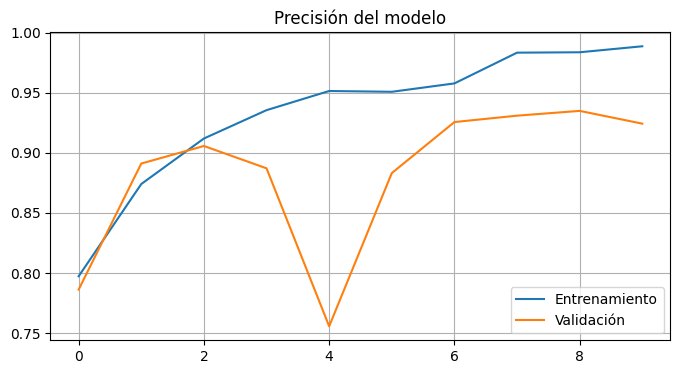

Accuracy final en validación: 92.43%


In [46]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 2

model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión del modelo')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"Accuracy final en validación: {history.history['val_accuracy'][-1] * 100:.2f}%")


## Mejorar accuracy

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6264 - loss: 0.6280 - val_accuracy: 0.7636 - val_loss: 0.5060
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8320 - loss: 0.4095 - val_accuracy: 0.7955 - val_loss: 0.4666
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8588 - loss: 0.3510 - val_accuracy: 0.8420 - val_loss: 0.3952
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8783 - loss: 0.3080 - val_accuracy: 0.8499 - val_loss: 0.3839
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8915 - loss: 0.2819 - val_accuracy: 0.8818 - val_loss: 0.2827
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9027 - loss: 0.2416 - val_accuracy: 0.8884 - val_loss: 0.2465
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9197 - loss: 0.1960 - val_accuracy: 0.9070 - val_loss: 0.2244
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9403 - loss: 0.1595 - val_accu

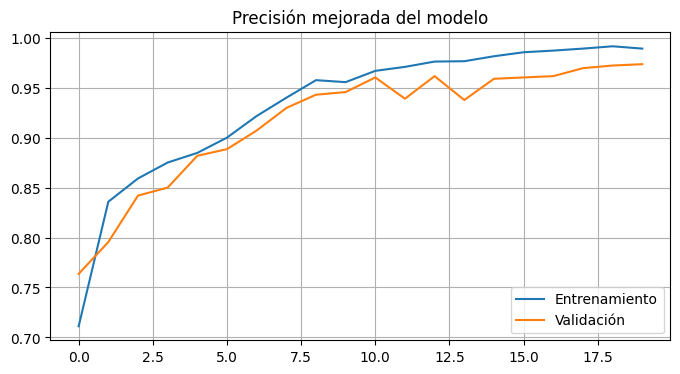

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

num_classes = 2

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

loss, accuracy = model.evaluate(val_ds)
print(f"\nAccuracy final del modelo en validación: {accuracy * 100:.2f}%")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión mejorada del modelo')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Comparación

In [52]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import load_img, img_to_array

base_path = '/content/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/Brain Tumor'
csv_path = '/content/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv'

df = pd.read_csv(csv_path)

df['filepath'] = df['Image'].apply(lambda x: os.path.join(base_path, x + '.jpg'))
df = df[df['filepath'].apply(os.path.exists)]

X = []
y = []

for _, row in df.iterrows():
    img = load_img(row['filepath'], target_size=(64, 64))
    img_array = img_to_array(img).flatten()
    X.append(img_array)
    y.append(row['Class'])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Accuracy SVM: {svm_acc*100:.2f}%")

# Regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)
print(f"Accuracy Regresión logística: {log_acc*100:.2f}%")

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Accuracy Random Forest: {rf_acc*100:.2f}%")

Accuracy SVM: 90.84%
Accuracy Regresión logística: 83.93%
Accuracy Random Forest: 93.63%
